# Part I - (Loan Data from Prosper Exploration)
## by Lynn Majerome

## Introduction
> The dataset being analyzed is from Prosper Loan,a peer-to-peer lending lending company . The data includes features such as loan amount, borrower rate, employment status, income range, and debt to income ratio. The goal of this analysis is to examine the relationships between these features and determine which factors have the greatest influence on loan amount, interest rate, and repayment amount.


## Preliminary Wrangling


In [1]:
!pip install -U matplotlib seaborn

    100% |████████████████████████████████| 11.5MB 2.8MB/s eta 0:00:01   18% |██████                          | 2.1MB 25.1MB/s eta 0:00:01    66% |█████████████████████▎          | 7.7MB 27.8MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 20.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 16.5MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   20% |██████▍                         | 2.7MB 23.7MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 795kB/s eta 0:00:01  1% |▌                               | 737kB 24.3MB/s eta 0:00:03    3% |█▎                              | 1.9MB 24.4MB/s eta 0:00:02    5% |█▉                              | 2.8MB 9.7MB/s eta 0:00:05    7% |██▎                             | 3.5MB 12.2MB/s eta 0:00:04    10% |███▎                            | 5.0MB 12.5MB/s eta 0:00:04    17% |█████▋                          | 8.6MB 23.0MB/s eta 0:00:02    19% |██████▍                    

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# load in the dataset into a pandas dataframe, print statistics
main_loans = pd.read_csv('prosperLoanData.csv')

In [4]:
# high-level overview of data shape and composition
print(main_loans.shape)
print(main_loans.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [5]:
main_loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# descriptive statistics for numeric variables
main_loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The Prosper Loan Data is a dataset that includes information about more than 113,000 loans made through the Prosper platform. The data includes both numerical values, like borrower rate, debt-to-income ratio, principal borrowed, original loan amount, and monthly loan payment, as well as categorical values such as borrower state, occupation, and employment status.

### What is/are the main feature(s) of interest in your dataset?

> The main goal of this dataset is to find out which applicants are approved for loans. Some questions we might want to answer include: Are the applicants employed? What is their occupation? Do they own a home? Do the trends change depending on the state the applicant lives in?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that individuals in higher income brackets will have lower interest rates on their, their income will be verifiable, and they are more likely to be homeowners. I also expect that there will be fewer self-employed borrowers compared to those who are employed or working full-time, and that those who are self-employed may have higher interest rates on their loans. Finally, I expect that states poor States, such as Mississippi, Louisiana, and New Mexico, will issue the most loans.

In [7]:
#keeping only columns I will use 
cols_to_keep = ['ListingKey', 'ListingNumber','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)', 'Term',
                'BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper',
               'CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','DebtToIncomeRatio','IncomeRange', 'IncomeVerifiable',
               'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'MonthlyLoanPayment' ]
loans = main_loans[cols_to_keep]

In [8]:
#save new df
loans.to_csv("loans.csv", index=False)

In [9]:
print(loans.shape)
print(loans.dtypes)

(113937, 22)
ListingKey                     object
ListingNumber                   int64
LoanStatus                     object
BorrowerRate                  float64
ProsperScore                  float64
ListingCategory (numeric)       int64
Term                            int64
BorrowerState                  object
Occupation                     object
EmploymentStatus               object
IsBorrowerHomeowner              bool
CreditScoreRangeLower         float64
CreditScoreRangeUpper         float64
CurrentCreditLines            float64
OpenCreditLines               float64
TotalCreditLinespast7years    float64
DebtToIncomeRatio             float64
IncomeRange                    object
IncomeVerifiable                 bool
ProsperPrincipalBorrowed      float64
LoanOriginalAmount              int64
MonthlyLoanPayment            float64
dtype: object


In [10]:
loans.head(5)

,ListingKey,ListingNumber,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Term,BorrowerState,Occupation,EmploymentStatus,...,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment
0,1021339766868145413AB3B,193129,Completed,0.1580,NaN,0,36,CO,Other,Self-employed,...,659.0,5.0,4.0,12.0,0.17,"$25,000-49,999",True,NaN,9425,330.43
1,10273602499503308B223C1,1209647,Current,0.0920,7.0,2,36,CO,Professional,Employed,...,699.0,14.0,14.0,29.0,0.18,"$50,000-74,999",True,NaN,10000,318.93
2,0EE9337825851032864889A,81716,Completed,0.2750,NaN,0,36,GA,Other,Not available,...,499.0,NaN,NaN,3.0,0.06,Not displayed,True,NaN,3001,123.32
3,0EF5356002482715299901A,658116,Current,0.0974,9.0,16,36,GA,Skilled Labor,Employed,...,819.0,5.0,5.0,29.0,0.15,"$25,000-49,999",True,NaN,10000,321.45
4,0F023589499656230C5E3E2,909464,Current,0.2085,4.0,2,36,MN,Executive,Employed,...,699.0,19.0,19.0,49.0,0.26,"$100,000+",True,11000.0,15000,563.97


In [11]:
loans.describe()

,ListingNumber,BorrowerRate,ProsperScore,ListingCategory (numeric),Term,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment
count,1.139370e+05,113937.000000,84853.000000,113937.000000,113937.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,105383.000000,22085.000000,113937.00000,113937.000000
mean,6.278857e+05,0.192764,5.950067,2.774209,40.830248,685.567731,704.567731,10.317192,9.260164,26.754539,0.275947,8472.311961,8337.01385,272.475783
std,3.280762e+05,0.074818,2.376501,3.996797,10.436212,66.458275,66.458275,5.457866,5.022644,13.637871,0.551759,7395.507650,6245.80058,192.697812
min,4.000000e+00,0.000000,1.000000,0.000000,12.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1000.00000,0.000000
25%,4.009190e+05,0.134000,4.000000,1.000000,36.000000,660.000000,679.000000,7.000000,6.000000,17.000000,0.140000,3500.000000,4000.00000,131.620000
50%,6.005540e+05,0.184000,6.000000,1.000000,36.000000,680.000000,699.000000,10.000000,9.000000,25.000000,0.220000,6000.000000,6500.00000,217.740000
75%,8.926340e+05,0.250000,8.000000,3.000000,36.000000,720.000000,739.000000,13.000000,12.000000,35.000000,0.320000,11000.000000,12000.00000,371.580000
max,1.255725e+06,0.497500,11.000000,20.000000,60.000000,880.000000,899.000000,59.000000,54.000000,136.000000,10.010000,72499.000000,35000.00000,2251.510000


## Univariate Exploration


> First, let's get a vizualisation of the icome bracket, the number of home owners, borrowers with verifiable income and a distributions of the debt to income ratio and interest rate

Find the different income brackets

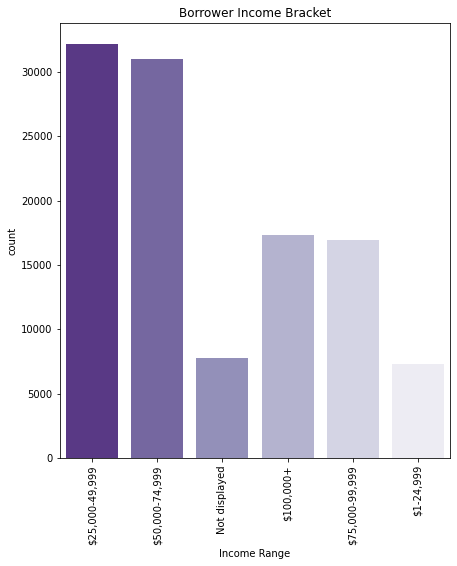

In [12]:
plt.figure(figsize=(7,8))

# Values to drop
to_drop = ['Not employed', '$0']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#create the countplot
g=sns.countplot(x='IncomeRange', data=dropped_range,palette='Purples_r')
plt.xticks(rotation=90)
plt.xlabel('Income Range')
plt.title('Borrower Income Bracket');

The majority of borrowers are in the in the 25,000-49,999 income bracket. 

How many homeowners are there compared to non-homeownerns?

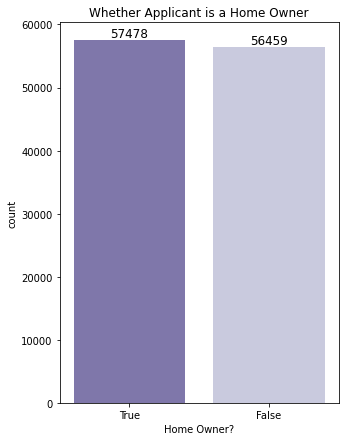

In [13]:
plt.figure(figsize=(5,7))

#Create the countplot for Homeowner
g = sns.countplot(x='IsBorrowerHomeowner', data=loans, palette='Purples_r', order=[True, False])
plt.xlabel('Home Owner?')
plt.title('Whether Applicant is a Home Owner');


# Add labels to the bars
for p in g.patches:
    g.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')


There are 57,478 homeonwners and 56,459 non-homeonwners. I expected a wider gap...

Find out verifiable income or no?

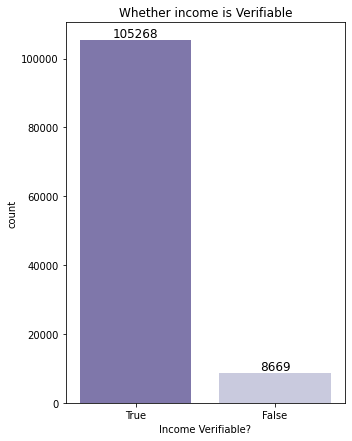

In [14]:
plt.figure(figsize=(5,7))

#Create the countplot for verifiable income
g=sns.countplot(x='IncomeVerifiable', data=loans, palette='Purples_r',order=[True, False])
plt.xlabel('Income Verifiable?')
plt.title('Whether income is Verifiable');

# Add labels to the bars
for p in g.patches:
    g.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

Now that's something I didn't expect. However it does make sense. A lender would not want to lender money if the borrower is not able to verify their sounce of income.

Calculate debt to income ratio

In [15]:
#replace null values with 0 in loans df
loans['DebtToIncomeRatio'].fillna(0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


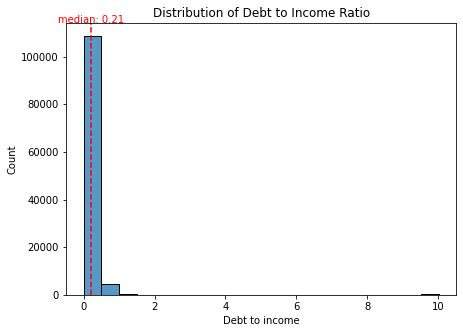

In [16]:
plt.figure(figsize=(7,5))

# Create the histogram
dtir_plot = sns.histplot(x='DebtToIncomeRatio', data=loans, bins=20)

# Calculate the median of the data
median = np.median(loans['DebtToIncomeRatio'])

# Add a vertical line at the median value on the first subplot
dtir_plot.axvline(median, color="r", linestyle="--")

# Add text displaying the median value on the first subplot
dtir_plot.text(median, dtir_plot.get_ylim()[1] - 2, f"median: {median:.2f}", ha="center", color="r")

plt.xlabel('Debt to income')
plt.title('Distribution of Debt to Income Ratio');


#sns.displot(x='BorrowerRate', data=loans,bins =20)
#plt.xlabel('Borrower Rate')
#plt.title('Distribution of Borrower Rate');

The debt to income ratio is mostly on the lower end with a very small distribution on the higher end. The large majority seems able to afford to take the loans as the median debt to income ratio is 0.21

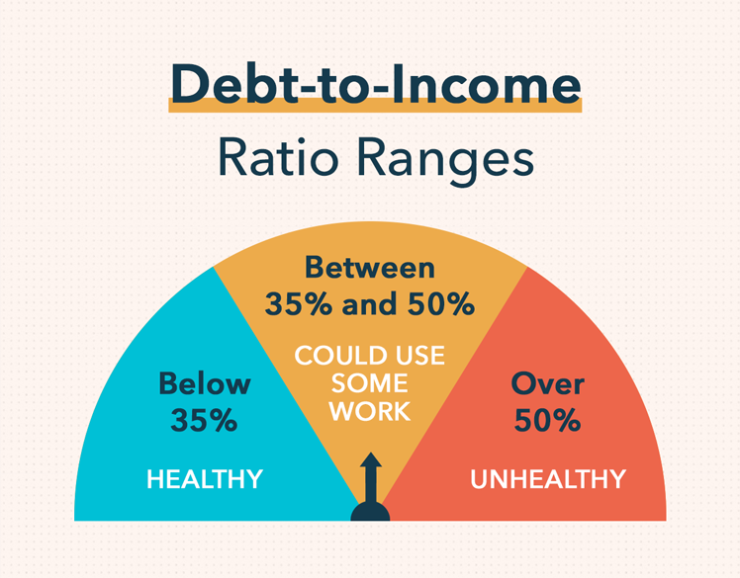


Find out the distribution for the interest rate

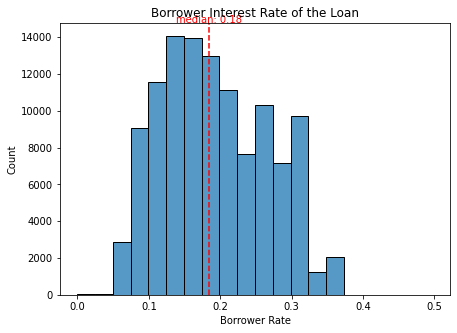

In [17]:
plt.figure(figsize=(7,5))

# Create the histogram
rate_plot = sns.histplot(x='BorrowerRate', data=loans, bins=20)

# Calculate the median of the data
median = np.median(loans['BorrowerRate'])

# Add a vertical line at the median value on the first subplot
rate_plot.axvline(median, color="r", linestyle="--")

# Add text displaying the median value on the first subplot
rate_plot.text(median, rate_plot.get_ylim()[1] - 2, f"median: {median:.2f}", ha="center", color="r")

plt.xlabel('Borrower Rate')
plt.title('Borrower Interest Rate of the Loan');

Right skewed with a few high interest rate

> Second, we will determine the employment status of the borrowers, distributions for both the principal amount, repayment amount.

Count of employment status

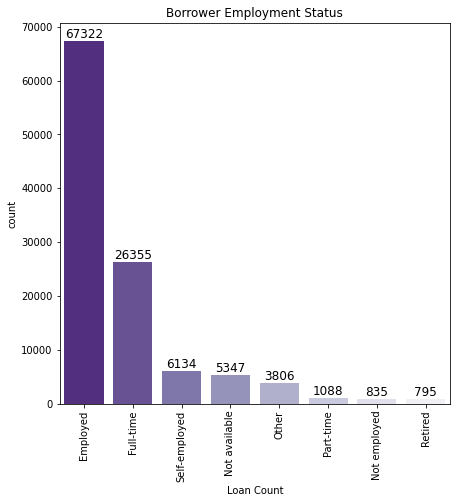

In [18]:
plt.figure(figsize=(7,7))

# Create the countplot
g = sns.countplot(x='EmploymentStatus', data=loans, palette='Purples_r',
                  order=['Employed','Full-time', 'Self-employed', 
                    'Not available', 'Other','Part-time', 'Not employed', 'Retired'])
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.xlabel('Loan Count')
plt.title('Borrower Employment Status');

# Add labels to the bars
for p in g.patches:
    g.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

Emplyed is the most common employment status

Let's find the distribution for the monthly repayment amount 

In [19]:
loans.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

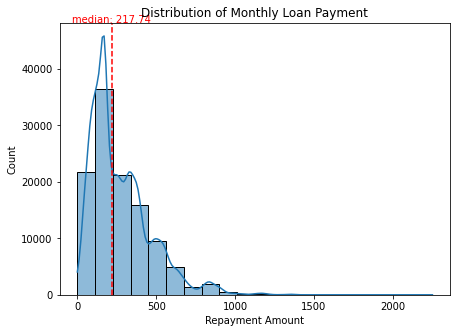

In [20]:
plt.figure(figsize=(7,5))

# Create the histogram
histplot = sns.histplot(x='MonthlyLoanPayment', data=loans, bins=20, kde=True)

# Calculate the median of the data
median = np.median(loans['MonthlyLoanPayment'])

# Add a vertical line at the median value on the first subplot
histplot.axvline(median, color="r", linestyle="--")

# Add text displaying the median value on the first subplot
histplot.text(median, histplot.get_ylim()[1] - 2, f"median: {median:.2f}", ha="center", color="r")

plt.xlabel('Repayment Amount')
plt.title('Distribution of Monthly Loan Payment');

Right skewed with the median being 217.74. 

Distribution for Original amount of loan

In [21]:
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

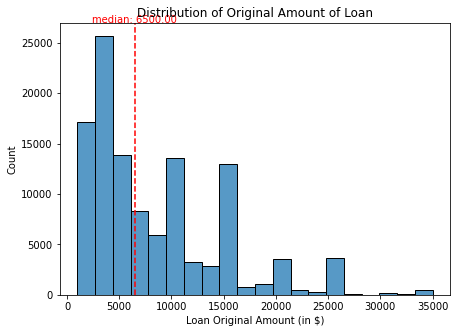

In [22]:
plt.figure(figsize=(7,5))

# Create the histogram
orloan_plot = sns.histplot(x='LoanOriginalAmount', data=loans, bins=20)

# Calculate the median of the data
median = np.median(loans['LoanOriginalAmount'])

# Add a vertical line at the median value on the first subplot
orloan_plot.axvline(median, color="r", linestyle="--")

# Add text displaying the median value on the first subplot
orloan_plot.text(median, orloan_plot.get_ylim()[1] - 2, f"median: {median:.2f}", ha="center", color="r")

plt.xlabel('Loan Original Amount (in $)')
plt.title('Distribution of Original Amount of Loan');

Median amount borrowed 6,500. A value lesser than the mean

> Finally, let's find out which state issues more loans

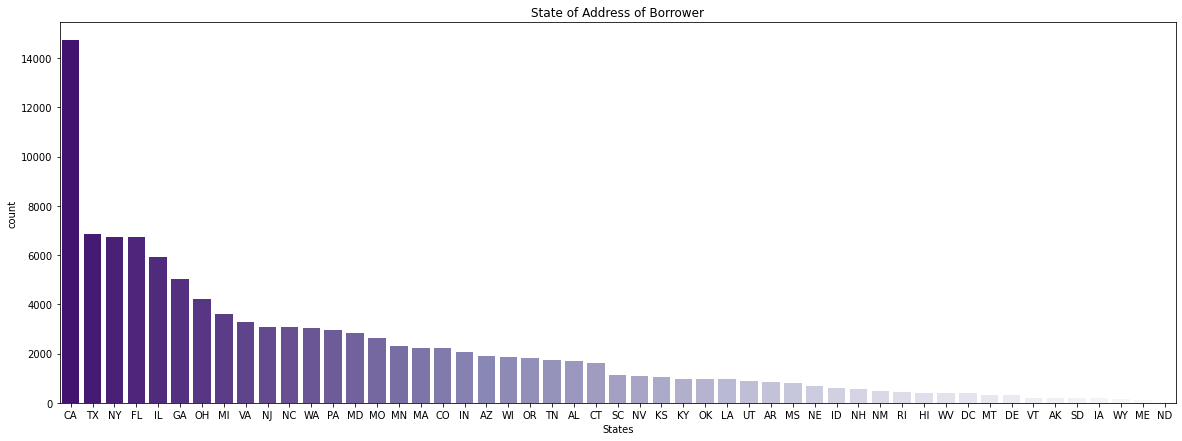

In [23]:
plt.figure(figsize=(20,7));

# Create and sort countplot
counts = loans['BorrowerState'].value_counts()

# Plot the countplot
sns.countplot(x='BorrowerState', data=loans, order=counts.index,  palette='Purples_r')
plt.xlabel('States')
plt.title('State of Address of Borrower');

California appears to be the states that issues the most loan. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The income to ratio distribution is skewed to the right with a median of 0.21.
>The distribution of borrower interest rates is skewed to the right, with a few very high interest rates. The median interest is around 0.18.
>The employment status of borrowers is fairly evenly distributed across the different categories, with a slight majority being employed.
>The distribution of loan status is fairly evenly distributed, with a slight majority of loans being current or completed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data showed that the majority of borrowers are in the 25,000-49,999 income bracket and the most common employment status among borrowers is being employed. Although there are more homeowners than non-homeowners borrowers, the difference between the number of homeowners and non-homeowners is not as large as expected. This may be because lenders do not always require a house as collateral in order to issue a loan, or because other forms of collateral are accepted. On the other hand, the difference between borrowers with verifiable and non-verifiable income is larger than expected. I had assumed lenders do not always require verification of income in order to issue loans. Finally, contrary to the assumption that there would be more loans issued in poorer states, the data showed that the number of loans issued in poorer states is not significantly higher than in other states.


## Bivariate Exploration


In this section, I will investigage the relationship between interest rate, loan amount and repayment amount with income bracket and employment status

Comparing interest rate with employment status

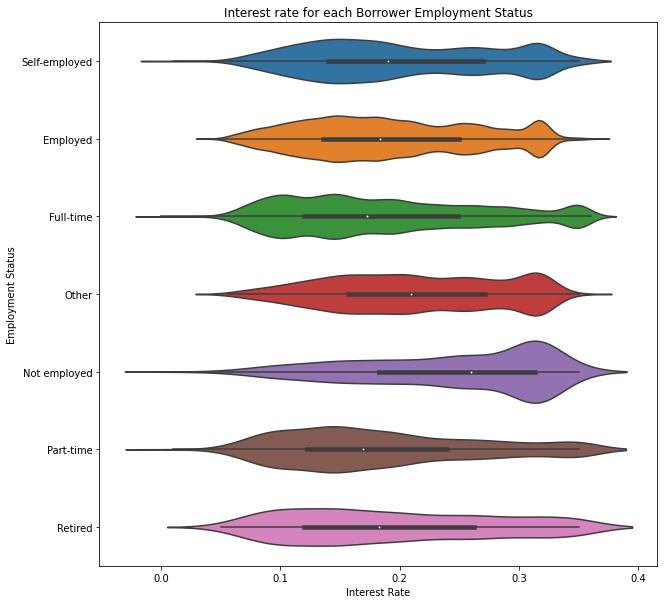

In [24]:
plt.figure(figsize=(10,10));

# Value to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#plot violin plot
sns.violinplot(y='EmploymentStatus', x='BorrowerRate', data=drop_na_df)
plt.xlabel('Interest Rate')
plt.ylabel('Employment Status')
plt.title('Interest rate for each Borrower Employment Status');

The employed and self employed genereally pay a higher interest rate

Employment Status and Principal comparison

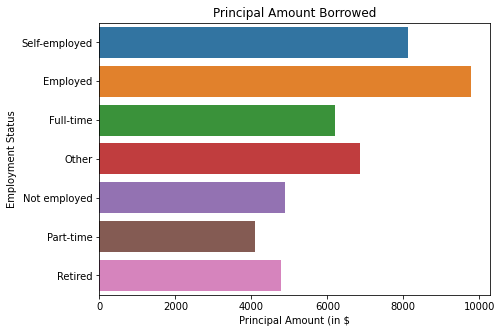

In [25]:
plt.figure(figsize=(7,5));

# Value to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#plot bar plot
sns.barplot(y='EmploymentStatus', x='LoanOriginalAmount', data=drop_na_df, ci=False);

plt.ylabel('Employment Status')
plt.xlabel('Principal Amount (in $')

plt.title('Principal Amount Borrowed');

Employed and self-employed generally borrow more

Employment Status and loan repayment comparison

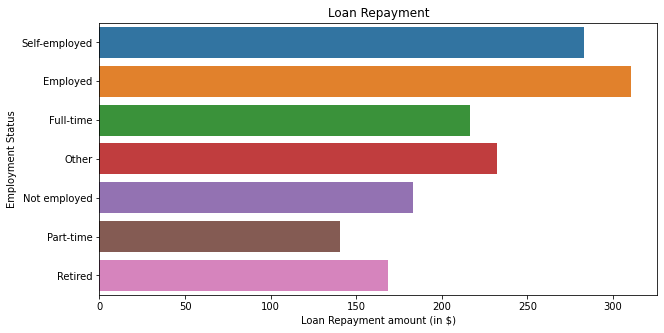

In [26]:
plt.figure(figsize=(10,5));

# Value to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#plot bar plot
sns.barplot(y='EmploymentStatus', x='MonthlyLoanPayment', data=drop_na_df, ci=False);

plt.ylabel('Employment Status')
plt.xlabel('Loan Repayment amount (in $)')

plt.title('Loan Repayment');

Employed and self-employed generally have a higer repayment amount

Income bracket and Principal borrowed comparison

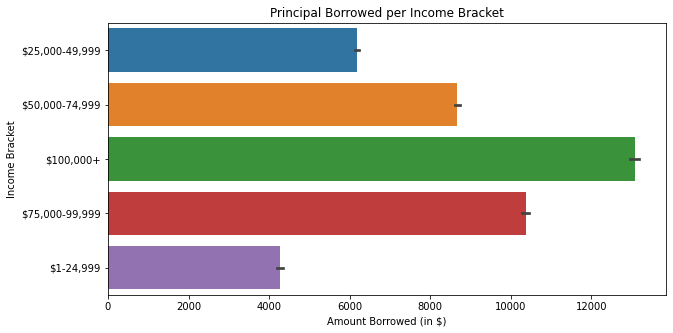

In [27]:
plt.figure(figsize=(10,5));

# Values to drop
to_drop = ['Not employed', '$0', 'Not displayed']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#plot bar plot
sns.barplot(y='IncomeRange', x='LoanOriginalAmount', data=dropped_range)

plt.ylabel('Income Bracket')
plt.xlabel('Amount Borrowed (in $)')

plt.title('Principal Borrowed per Income Bracket');

income brackets 25-49K, 50-74K and 100K borrow more

Interest rate and income bracket comparison

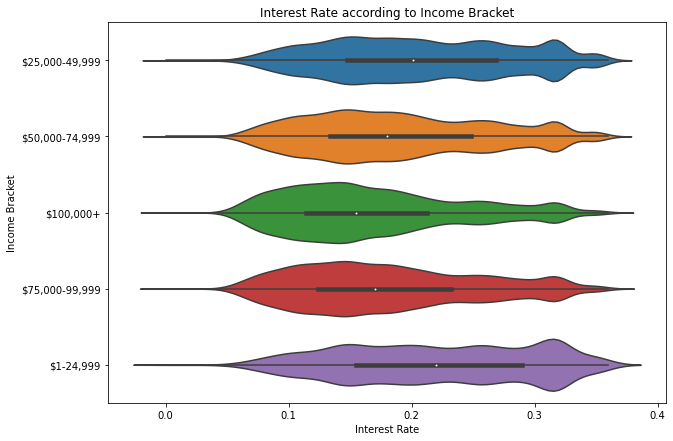

In [28]:
plt.figure(figsize=(10,7))

# Values to drop
to_drop = ['Not employed', '$0', 'Not displayed']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#create plot
sns.violinplot(y='IncomeRange', x='BorrowerRate', data=dropped_range)
plt.ylabel('Income Bracket')
plt.xlabel('Interest Rate')
plt.title('Interest Rate according to Income Bracket');

Those in the 100K+ bracket have generally have the lowest interet rate

Repayment amount and income braket comparison

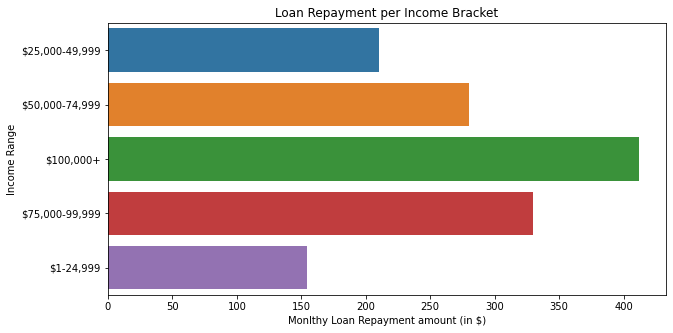

In [29]:
plt.figure(figsize=(10,5));

# Values to drop
to_drop = ['Not employed', '$0', 'Not displayed']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#plot bar plot
sns.barplot(y='IncomeRange', x='MonthlyLoanPayment', data=dropped_range, ci=False);

plt.ylabel('Income Range')
plt.xlabel('Monlthy Loan Repayment amount (in $)')

plt.title('Loan Repayment per Income Bracket');

Repayment amount for those in the 100K+ bracket seems to be higher. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There  appears to be a relationship between income range and borrower rate, with those in higher income brackets indeed having lower interest rates. Also, the monthly repayment amount appears to be higher for those in higher income brackets, potentially due to them taking out larger loans with lower interest rates. Both employed and Self-employed borrow more and have higher monthly repayment amount. This may be because in a higher income bracket, the employed and self-employed are able to secure larger loans with lower interest rates. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was a relationship between the amount borrowed and the income range of the borrower, with those in higher income brackets tending to borrow more money. 
> The part-timers and retired individuals had the lowest amounts borrowed and repaid.

## Multivariate Exploration


Income bracket, interest rate and homeownership relationship

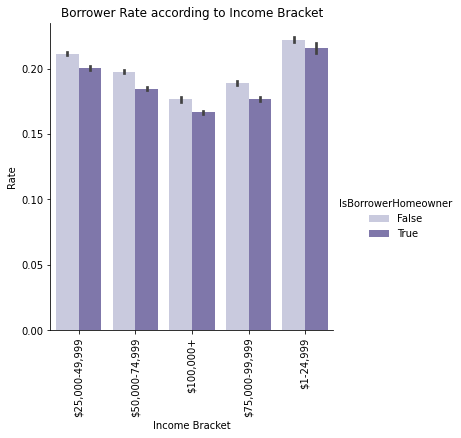

In [30]:
# Values to drop
to_drop = ['Not employed', '$0', 'Not displayed']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#create barplot
sns.catplot(x='IncomeRange', y='BorrowerRate', data=dropped_range, hue='IsBorrowerHomeowner', 
            palette='Purples', kind='bar') 
plt.xticks(rotation=90)
plt.xlabel('Income Bracket')
plt.ylabel('Rate')
plt.title('Borrower Rate according to Income Bracket');

Homeowners don't necessarily pay lower interest rates. 

Employment status, interest rate and homeownership relationship

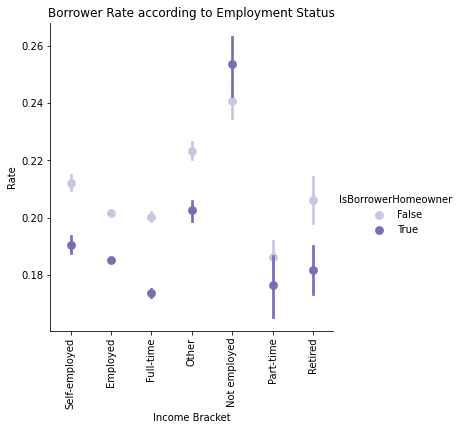

In [31]:
# Values to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#create joint plot
g=sns.catplot(x='EmploymentStatus', y='BorrowerRate', data=drop_na_df, hue='IsBorrowerHomeowner',
            kind='point', join=False, palette='Purples') 
plt.xticks(rotation=90)
plt.xlabel('Income Bracket')
plt.ylabel('Rate')
plt.title('Borrower Rate according to Employment Status');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The analysis of the data suggests that employment status and income bracket are significant factors in determining a borrower's interest rate. Borrowers who are employed tend to have lower interest rates compared to self-employed and part-time borrowers, regardless of whether they are homeowners or not. Additionally, homeowners who are retired tend to have lower interest rates compared to non-homeowners who are retired. There is also a slight trend for borrowers in the lower income brackets to have higher interest rates, but this trend does not seem to be consistently impacted by homeownership. Overall, these plots suggest that employment status and income bracket are important factors in determining the Borrower's interest rate, and that homeownership might play a role in some cases.


### Were there any interesting or surprising interactions between features?

> One interesting or surprising interaction between features that I noticed is that homeownership status appeared to have a stronger impact on borrower rate for those in lower income brackets. Likewise, the difference in borrower rate between homeowners and non-homeowners was more pronounced for the self-employed and part-timers. This suggests that homeownership may be more influential on borrower rate for those with lower income or less stable employment.

## Conclusions
> It appears that income range and employment status may have a noticeable influence on a borrower's interest rate. From the data, it seems that employed borrowers tend to have lower interest rates compared to other employment statuses. Additionally, homeowners typically have lower interest rates compared to non-homeowners. However, it is worth noting that the effect of homeownership on interest rates is not consistent across different income brackets or employment statuses. In general, these findings suggest that borrowers who are financially stable and have steady employment are more likely to be offered lower interest rates on their loans.

> During the data exploration process, several univariate and bivariate plots were created in order to analyse of various features to understand their distribution and relationships with the main feature(s) of interest. To visualize the data and identify patterns, plots such as histograms, boxplots, and violin plots were used. Additionally, the relationships between different features were examined using plots such as barplots and pointplots to gain further insights. This data exploration process helped to better potential factors that may impact the borrower's interest rate.

